In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
!pip install datashader
!pip install bokeh
!pip install holoviews

     |████████████████████████████████| 15.8 MB 2.6 kB/s 
     |████████████████████████████████| 76 kB 3.8 MB/s 
     |████████████████████████████████| 132 kB 31.5 MB/s 
     |████████████████████████████████| 802 kB 35.1 MB/s 
     |████████████████████████████████| 802 kB 54.8 MB/s 
     |████████████████████████████████| 793 kB 46.8 MB/s 
     |████████████████████████████████| 793 kB 61.9 MB/s 
     |████████████████████████████████| 791 kB 61.3 MB/s 
     |████████████████████████████████| 786 kB 56.6 MB/s 
     |████████████████████████████████| 779 kB 50.6 MB/s 
     |████████████████████████████████| 778 kB 43.7 MB/s 
     |████████████████████████████████| 776 kB 54.7 MB/s 
     |████████████████████████████████| 769 kB 49.5 MB/s 
     |████████████████████████████████| 766 kB 45.5 MB/s 
     |████████████████████████████████| 1.0 MB 56.2 MB/s 
     |████████████████████████████████| 722 kB 48.6 MB/s 
     |████████████████████████████████| 722 kB 43.6 MB/s 
     |██████████

In [4]:
!pip install sentence-transformers

     |████████████████████████████████| 78 kB 3.3 MB/s 
     |████████████████████████████████| 3.4 MB 11.4 MB/s 
     |████████████████████████████████| 6.8 MB 18.4 MB/s 
     |████████████████████████████████| 1.2 MB 42.2 MB/s 
     |████████████████████████████████| 61 kB 489 kB/s 
     |████████████████████████████████| 895 kB 44.8 MB/s 
     |████████████████████████████████| 3.3 MB 22.5 MB/s 
     |████████████████████████████████| 596 kB 47.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=0ca79f10247b82aff2bdc9262544796cc1f7797167ffd9810f0f9497896aec65
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
from sentence_transformers import SentenceTransformer

In [6]:
sentence_bert_model = SentenceTransformer('all-mpnet-base-v2')

def get_embeddings(sentences):
    return sentence_bert_model.encode(sentences, batch_size=32)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [7]:
pd.options.display.max_colwidth = 250

In [10]:
for chapter in range(3, 19):
  topic_df = pd.read_csv('/content/drive/MyDrive/religious_texts/eknath easwaran/predicted sentiment/chapter ' + str(chapter))
  topic_df = topic_df.drop(['Unnamed: 0', 'Official report'], axis=1)
  topic_df['Chapter'] = 1

  topic_df['Author'] = 'Eknath Easwaran'


  topic_df2 = pd.read_csv('/content/drive/MyDrive/religious_texts/mahatma gandhi/predicted sentiment/chapter ' + str(chapter))
  topic_df2 = topic_df2.drop(['Unnamed: 0', 'Official report'], axis=1)
  topic_df2['Chapter'] = 1

  topic_df2['Author'] = 'Mahatma Gandhi'
  topic_df = pd.concat([topic_df, topic_df2], axis=0)

  topic_df3 = pd.read_csv('/content/drive/MyDrive/religious_texts/purohit swami/predicted sentiment/chapter ' + str(chapter))
  topic_df3 = topic_df3.drop(['Unnamed: 0', 'Official report'], axis=1)
  topic_df3['Chapter'] = 1

  topic_df3['Author'] = 'Shri Purohit Swami'
  topic_df = pd.concat([topic_df, topic_df3], axis=0)

  verses_df = topic_df['Tweet']
  verses_df = verses_df.reset_index()

  verses_df.drop(['index'], axis=1, inplace=True)

  e = get_embeddings(verses_df['Tweet'])

  print('len dim 1 ', len(e))
  print('\n')

  np.save("/content/drive/MyDrive/religious_texts/experiments/chapter" + str(chapter) + ".npy", e)

In [9]:
for chapter in range(1, 19):
  df = pd.read_csv('/content/drive/MyDrive/religious_texts/eknath easwaran/predicted sentiment/chapter ' + str(chapter))
  df = df.drop(['Unnamed: 0', 'Official report'], axis=1)
  df['Chapter'] = chapter

  topic_df = pd.concat([topic_df, df], axis=0)

topic_df['Author'] = 'Eknath Easwaran'

for chapter in range(1, 19):
  df = pd.read_csv('/content/drive/MyDrive/religious_texts/mahatma gandhi/predicted sentiment/chapter ' + str(chapter))
  df = df.drop(['Unnamed: 0', 'Official report'], axis=1)
  df['Chapter'] = chapter

  topic_df2 = pd.concat([topic_df2, df], axis=0)

topic_df2['Author'] = 'Mahatma Gandhi'
topic_df = pd.concat([topic_df, topic_df2], axis=0)

for chapter in range(1, 19):
  df = pd.read_csv('/content/drive/MyDrive/religious_texts/purohit swami/predicted sentiment/chapter ' + str(chapter))

  df = df.drop(['Unnamed: 0', 'Official report'], axis=1)
  df['Chapter'] = chapter

  topic_df3 = pd.concat([topic_df3, df], axis=0)

topic_df3['Author'] = 'Shri Purohit Swami'
topic_df = pd.concat([topic_df, topic_df3], axis=0)

In [11]:
topic_df

,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Surprise,Joking,Chapter,Author
0,"ARJUNA: O Krishna, you have said that knowledge is greater than action; why then do you ask me to wage this terrible war?",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,Eknath Easwaran
1,Your advice seems inconsistent. Give me one path to follow to the supreme good.,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Eknath Easwaran
2,"KRISHNA: At the beginning of time I declared two paths for the pure heart: jnana yoga, the contemplative path of spiritual wisdom, and karma yoga, the active path of selfless service.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,Eknath Easwaran
3,One who shirks action does not attain freedom; no one can gain perfection by abstaining from work.,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,Eknath Easwaran
4,"Indeed, there is no one who rests for even an instant; all creatures are driven to action by their own nature.",0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,Eknath Easwaran
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,"Sanjaya told: “Thus have I heard this rare, wonderful and soul-stirring discourse of the Lord Shri Krishna and the great-souled Arjuna.",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18,Shri Purohit Swami
73,"Through the blessing of the sage Vyasa, I listened to this secret and noble science from the lips of its Master, the Lord Shri Krishna.",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,Shri Purohit Swami
74,"O King! The more I think of that marvellous and holy discourse, the more I lose myself in joy.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18,Shri Purohit Swami
75,"As memory recalls again and again the exceeding beauty of the Lord, I am filled with amazement and happiness.",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,Shri Purohit Swami


In [12]:
topic_df.tail(10)

,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Surprise,Joking,Chapter,Author
67,"Nor is there among men any who can perform a service dearer to Me than this, or any man on earth more beloved by Me than he.",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,18,Shri Purohit Swami
68,"He who will study this spiritual discourse of ours, I assure you, he shall thereby worship Me at the altar of Wisdom.",1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18,Shri Purohit Swami
69,"Yea, he who listens to it with faith and without doubt, even he, freed from evil, shall rise to the worlds which the virtuous attain through righteous deeds.",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,Shri Purohit Swami
70,O Arjuna! Have you listened attentively to My words? Has your ignorance and your delusion gone?,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,18,Shri Purohit Swami
71,"Arjuna replied: My Lord! O Immutable One! My delusion has fled. By Your Grace, O Changeless One, the light has dawned. My doubts are gone, and I stand before You ready to do Your will.”",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,Shri Purohit Swami
72,"Sanjaya told: “Thus have I heard this rare, wonderful and soul-stirring discourse of the Lord Shri Krishna and the great-souled Arjuna.",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18,Shri Purohit Swami
73,"Through the blessing of the sage Vyasa, I listened to this secret and noble science from the lips of its Master, the Lord Shri Krishna.",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,Shri Purohit Swami
74,"O King! The more I think of that marvellous and holy discourse, the more I lose myself in joy.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18,Shri Purohit Swami
75,"As memory recalls again and again the exceeding beauty of the Lord, I am filled with amazement and happiness.",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,Shri Purohit Swami
76,"Wherever is the Lord Shri Krishna, the Prince of Wisdom, and wherever is Arjuna, the Great Archer, I am more than convinced that good fortune, victory, happiness and righteousness will follow”",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,Shri Purohit Swami


In [13]:
verses_df = topic_df['Tweet']
verses_df = verses_df.reset_index()

In [14]:
verses_df.drop(['index'], axis=1, inplace=True)
verses_df

,Tweet
0,"ARJUNA: O Krishna, you have said that knowledge is greater than action; why then do you ask me to wage this terrible war?"
1,Your advice seems inconsistent. Give me one path to follow to the supreme good.
2,"KRISHNA: At the beginning of time I declared two paths for the pure heart: jnana yoga, the contemplative path of spiritual wisdom, and karma yoga, the active path of selfless service."
3,One who shirks action does not attain freedom; no one can gain perfection by abstaining from work.
4,"Indeed, there is no one who rests for even an instant; all creatures are driven to action by their own nature."
...,...
2306,"Sanjaya told: “Thus have I heard this rare, wonderful and soul-stirring discourse of the Lord Shri Krishna and the great-souled Arjuna."
2307,"Through the blessing of the sage Vyasa, I listened to this secret and noble science from the lips of its Master, the Lord Shri Krishna."
2308,"O King! The more I think of that marvellous and holy discourse, the more I lose myself in joy."
2309,"As memory recalls again and again the exceeding beauty of the Lord, I am filled with amazement and happiness."


In [15]:
e = get_embeddings(verses_df['Tweet'])

In [16]:
print(len(e[0]))  # each encoded verse is represented in a 768 dimensional space

768


In [17]:
print(len(e))     # number of verses

2311


In [18]:
print(e)

[[ 0.07761035  0.04950177 -0.01026193 ...  0.05268696 -0.03520646
  -0.0097227 ]
 [ 0.05791061  0.09232577 -0.01617108 ... -0.01951109  0.03479415
   0.00035334]
 [ 0.04629162 -0.01365176 -0.01338486 ... -0.05175253 -0.02945135
  -0.04086216]
 ...
 [-0.01182564  0.08044552 -0.0114093  ...  0.02932844 -0.0109165
  -0.00763212]
 [-0.06178277  0.06232151 -0.03026685 ... -0.00957912  0.01017136
  -0.02068159]
 [ 0.05968423  0.0666908  -0.03869361 ...  0.03603533  0.0022865
  -0.05855174]]


In [19]:
# save the numpy array
np.save("/content/drive/MyDrive/religious_texts/experiments/all_chapters.npy", e)

In [20]:
# Convert NumPy array of embedding into data frame
embedding_df = pd.DataFrame(e)

# Save dataframe as as TSV file without any index and header
embedding_df.to_csv('/content/drive/MyDrive/religious_texts/experiments/all_chapters.tsv', sep='\t', index=None, header=None)

In [21]:
embedding_df.shape

(2311, 768)

In [22]:
# save the metadata
topic_df.to_csv('/content/drive/MyDrive/religious_texts/experiments/metadata_all_chapters.tsv', index=False, sep='\t')

In [ ]:
loaded_array = np.load("/content/drive/MyDrive/religious_texts/experiments/chapter2.npy")

In [ ]:
print(len(loaded_array))

215


# Read Dataframe

In [ ]:
embedding_df = pd.read_csv('/content/drive/MyDrive/religious_texts/experiments/chapter2.tsv', sep='\t')
topic_df = pd.read_csv('/content/drive/MyDrive/religious_texts/experiments/metadata_chapter2.tsv', sep='\t')

In [ ]:
print(embedding_df)

     0.08539137  -0.032630414  ...  -0.056161437  -0.014049954
0      0.048316      0.060855  ...     -0.045750     -0.023871
1      0.027372      0.068312  ...      0.044702     -0.049241
2      0.021493      0.048755  ...      0.000773     -0.002989
3      0.031162      0.093267  ...      0.008352      0.010434
4      0.018708      0.079327  ...     -0.039699      0.019578
..          ...           ...  ...           ...           ...
209    0.012604      0.022193  ...      0.039916      0.002946
210    0.037681      0.085698  ...      0.047605      0.009063
211    0.064731      0.080189  ...      0.039936     -0.001627
212    0.040052      0.052736  ...      0.038345     -0.030065
213    0.042927     -0.020242  ...     -0.003353     -0.002077

[214 rows x 768 columns]


In [ ]:
topic_df.shape

(215, 13)

# t-SNE

In [ ]:
# You need to restart the notebook after running this cell once
import numpy as np
!pip install scikit-learn==0.21.3
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 3)

In [ ]:
tsne = TSNE(perplexity=50)
X_embedded = tsne.fit_transform(e)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


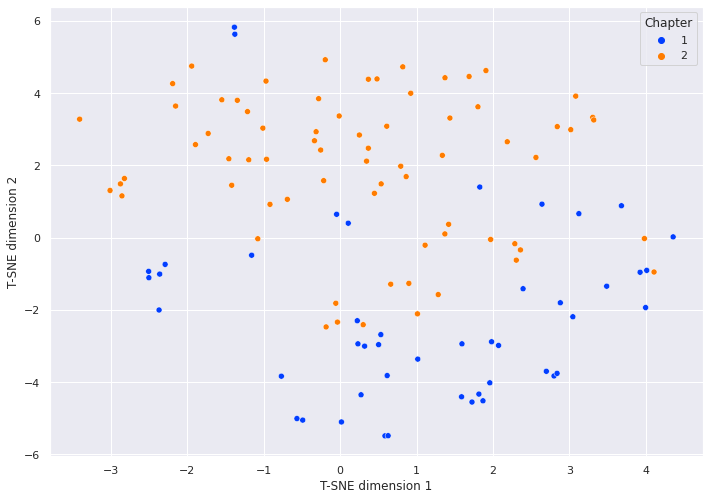

In [ ]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=topic_df['Chapter'], legend='full', palette=palette)
plt.xlabel(xlabel='T-SNE dimension 1')
plt.ylabel(ylabel='T-SNE dimension 2')

plt.show()

In [ ]:
print(len(X_embedded))

2096


In [ ]:
print(len(X_embedded[0]))

2


In [ ]:
topic_df

# UMAP

In [23]:
import datashader
import bokeh
import holoviews

In [24]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 2.4 MB/s 
     |████████████████████████████████| 1.1 MB 31.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=da63c11b27372b8f4c450071dd93101cf7dc46c633ad8eb9af1e8689c935061b
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=72c3b120720feb3c85c83046763fbcb2bc42aa81572f5b0c73cfa892a8a36dec
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette("bright", 3)
import umap.plot

In [26]:
import umap

In [27]:
e.shape

(2311, 768)

In [28]:
loaded_array = np.load('/content/drive/MyDrive/religious_texts/experiments/all_chapters.npy')
topic_df = pd.read_csv('/content/drive/MyDrive/religious_texts/experiments/metadata_all_chapters.tsv', sep='\t')

In [29]:
loaded_array.shape

(2311, 768)

In [30]:
topic_df.shape

(2311, 13)

In [44]:
# Refer this documentation for tuning UMAP hyperparameters: https://umap-learn.readthedocs.io/en/latest/parameters.html 

reducer = umap.UMAP(random_state=42, n_components=2, n_neighbors=70, min_dist=0.1)
reducer.fit(loaded_array)
embedding = reducer.transform(loaded_array)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


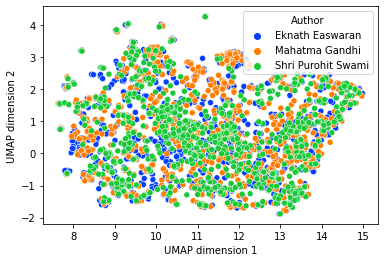

In [45]:
sns.scatterplot(embedding[:,0], embedding[:,1], hue=topic_df['Author'], legend='full', palette=palette)
plt.xlabel(xlabel='UMAP dimension 1')
plt.ylabel(ylabel='UMAP dimension 2')

plt.show()

In [33]:
len(embedding)

2311

In [34]:
len(embedding[0])

2

In [ ]:
topic_df

,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Surprise,Joking,Chapter,Author
0,"ARJUNA: O Krishna, you have said that knowledge is greater than action; why then do you ask me to wage this terrible war?",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,Eknath Easwaran
1,Your advice seems inconsistent. Give me one path to follow to the supreme good.,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Eknath Easwaran
2,"KRISHNA: At the beginning of time I declared two paths for the pure heart: jnana yoga, the contemplative path of spiritual wisdom, and karma yoga, the active path of selfless service.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,Eknath Easwaran
3,One who shirks action does not attain freedom; no one can gain perfection by abstaining from work.,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,Eknath Easwaran
4,"Indeed, there is no one who rests for even an instant; all creatures are driven to action by their own nature.",0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,Eknath Easwaran
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,It is the wise man’s constant enemy; it tarnishes the face of wisdom. It is as insatiable as a flame of fire.,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,Shri Purohit Swami
125,"It works through the senses, the mind and the reason; and with their help destroys wisdom and confounds the soul.",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,Shri Purohit Swami
126,"Therefore, O Arjuna, first control your senses and then slay desire, for it is full of sin, and is the destroyer of knowledge and of wisdom.",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,Shri Purohit Swami
127,"It is said that the senses are powerful. But beyond the senses is the mind, beyond the mind is the intellect, and beyond and greater than intellect is He.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,Shri Purohit Swami


#UMAP PLOT for Interactive visualization of verses

In [35]:
topic_df.reset_index(inplace=True)

In [36]:
topic_df

,index,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Surprise,Joking,Chapter,Author
0,0,"ARJUNA: O Krishna, you have said that knowledge is greater than action; why then do you ask me to wage this terrible war?",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,Eknath Easwaran
1,1,Your advice seems inconsistent. Give me one path to follow to the supreme good.,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Eknath Easwaran
2,2,"KRISHNA: At the beginning of time I declared two paths for the pure heart: jnana yoga, the contemplative path of spiritual wisdom, and karma yoga, the active path of selfless service.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,Eknath Easwaran
3,3,One who shirks action does not attain freedom; no one can gain perfection by abstaining from work.,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,Eknath Easwaran
4,4,"Indeed, there is no one who rests for even an instant; all creatures are driven to action by their own nature.",0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,Eknath Easwaran
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306,2306,"Sanjaya told: “Thus have I heard this rare, wonderful and soul-stirring discourse of the Lord Shri Krishna and the great-souled Arjuna.",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18,Shri Purohit Swami
2307,2307,"Through the blessing of the sage Vyasa, I listened to this secret and noble science from the lips of its Master, the Lord Shri Krishna.",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,Shri Purohit Swami
2308,2308,"O King! The more I think of that marvellous and holy discourse, the more I lose myself in joy.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18,Shri Purohit Swami
2309,2309,"As memory recalls again and again the exceeding beauty of the Lord, I am filled with amazement and happiness.",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,Shri Purohit Swami


In [37]:
hover_data = pd.DataFrame({'label': topic_df['Author']})
hover_data['item'] = topic_df['Tweet']

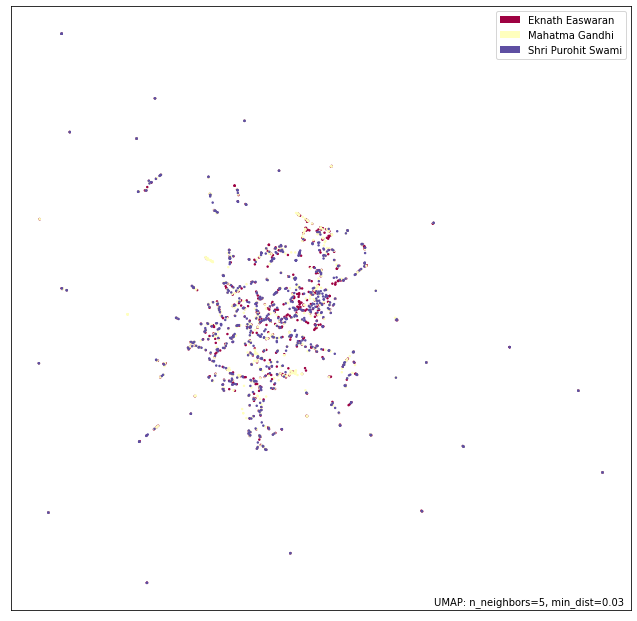

In [38]:
mapper = umap.UMAP(random_state=42, n_neighbors=5, min_dist=0.03).fit(loaded_array)
umap.plot.points(mapper, labels = topic_df['Author'])

In [40]:
umap.plot.output_notebook()

p = umap.plot.interactive(mapper, labels=topic_df['Author'], hover_data=hover_data, point_size=5, theme='blue')
umap.plot.show(p)